In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
np.random.seed(3)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow_from_directory(
                            'handwriting_shape/train',
                            target_size = (24,24),
                            batch_size = 3,
                            class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
                            'handwriting_shape/test',
                            target_size = (24,24),
                            batch_size = 3,
                            class_mode = 'categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [45]:
model = Sequential()

In [46]:
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (24,24,3)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [47]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

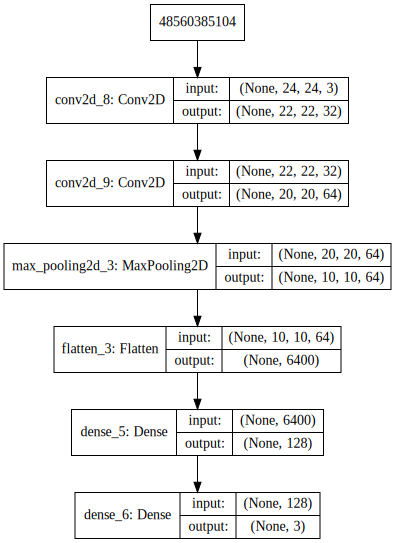

In [48]:
SVG(model_to_dot(model, show_shapes = True).create(prog='dot', format='svg'))

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)


Epoch 1/50
15/15 [==============================] - 2s 127ms/step - loss: 0.8710 - acc: 0.5111 - val_loss: 0.4052 - val_acc: 0.8667
Epoch 2/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0966 - acc: 1.0000 - val_loss: 0.0452 - val_acc: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.0511 - val_acc: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 26ms/step - loss: 7.6160e-04 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 26ms/step - loss: 3.5200e-04 - acc: 1.0000 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 26ms/step - loss: 2.0870e-04 - acc: 1.0000 - val_loss: 0.0207 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 25ms/step - loss: 1.6004e-04 - acc: 1.0000 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 26ms/step -

In [51]:
print("Evaluate")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s:%2.f%%" %(model.metrics_names[1],scores[1]*100))

Evaluate
acc:100%


In [55]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.035 0.942 0.023]
 [0.000 0.002 0.998]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]]


In [58]:
test_generator.data_format

'channels_last'